## Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
df = pd.read_csv("C:/Users/ERDEM/Desktop/v2.0/Miuul Machine Learning/0-kodlar/machine_learning-220803-231749/machine_learning/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

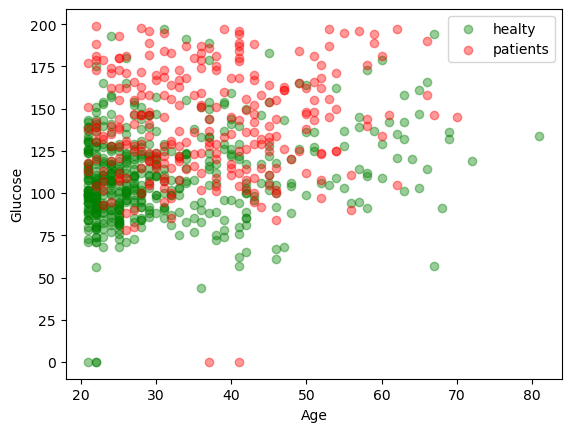

In [6]:
patients = df[df.Outcome == 1]
healty_people = df[df.Outcome == 0]


# Şimdilik sadece gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(healty_people.Age, healty_people.Glucose, color="green", label="healty", alpha = 0.4)
plt.scatter(patients.Age, patients.Glucose, color="red", label="patients", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [7]:
# there aren't missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Outlier Problems

def outlier_threholds(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3 - q1
    
    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
    
    return low_limit, up_limit


def replace_with_thresholds(df, col):
    low_limit, up_limit = outlier_threholds(df, col)
    
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col ] = up_limit
    

def check_outliers(df, col):
    low_limit, up_limit = outlier_threholds(df, col)
    
    if ((df[col] > up_limit) | (df[col] < low_limit)).any(axis=None):
        return print(f"{col} is outlier")
    else:
        return print("outliers were removed")

outliers were removed
outliers were removed
outliers were removed
outliers were removed
outliers were removed
outliers were removed
outliers were removed
outliers were removed


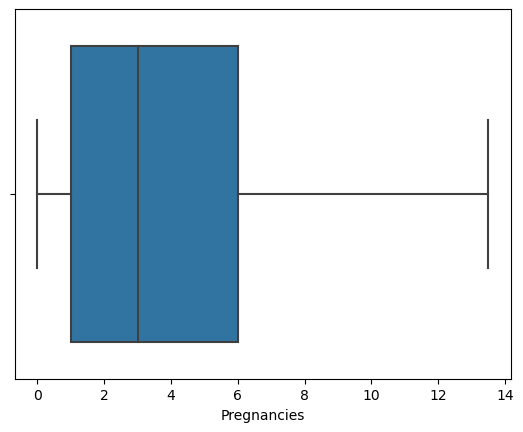

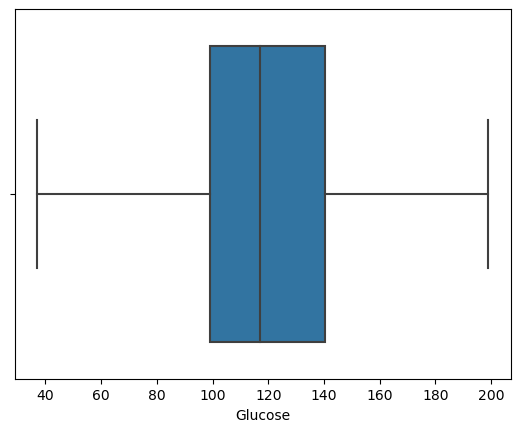

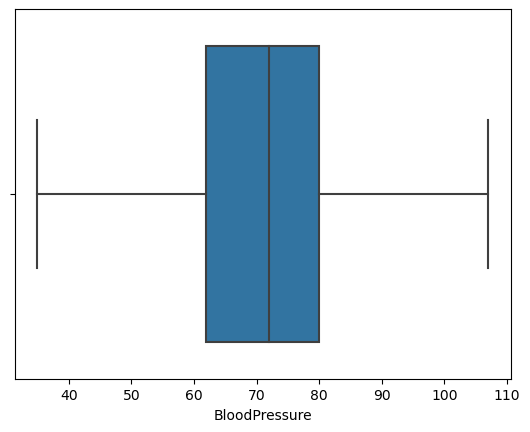

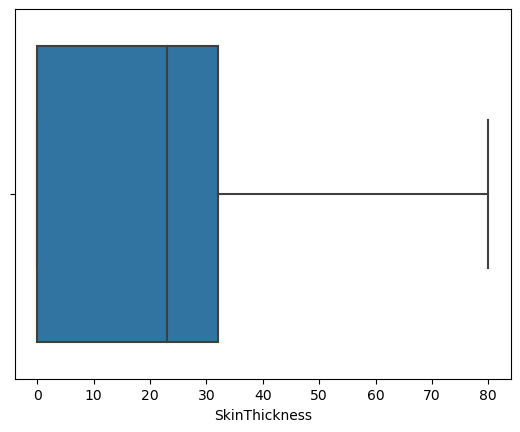

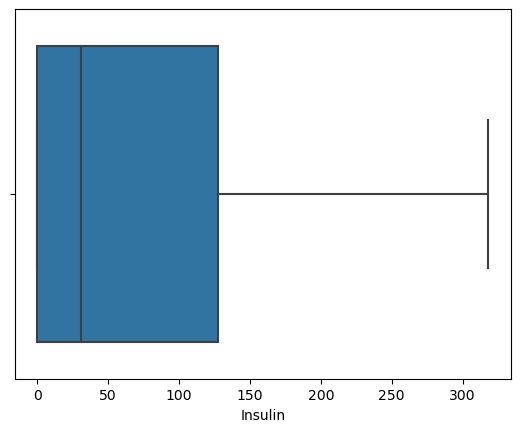

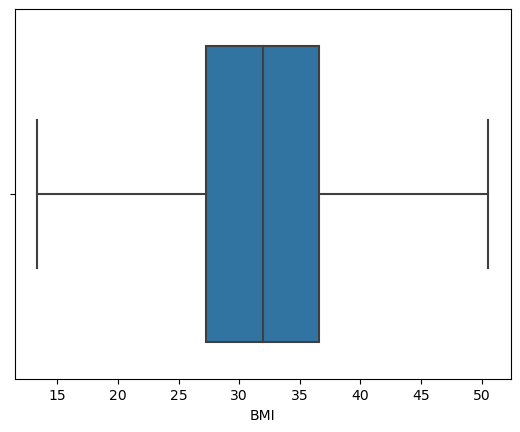

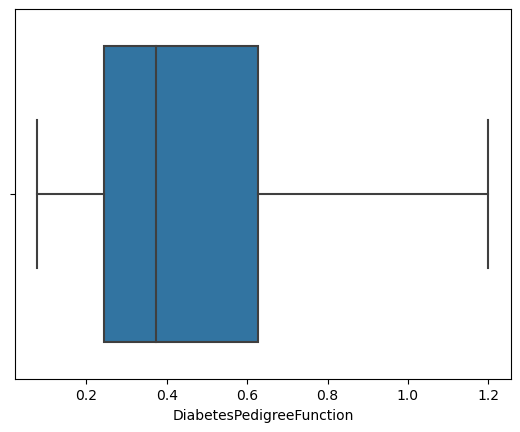

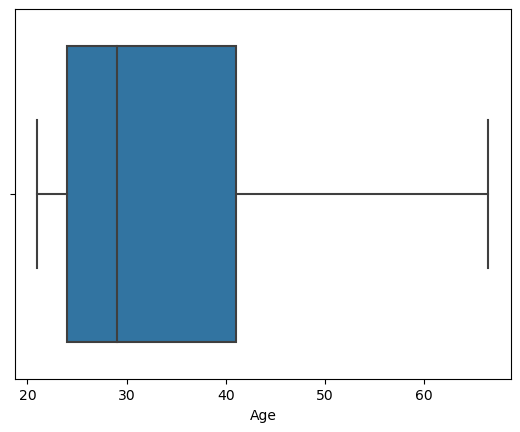

In [11]:
# Outlier detected
cols = [col for col in df.columns if col not in "Outcome"]
for col in cols:
    plt.figure()
    sns.boxplot(data=df, x= col)


for col in cols:
    check_outliers(df, col)
 

for col in cols:
    replace_with_thresholds(df, col)
    

#Finaly outlier data was removed

## Modelling

In [13]:
# x ve y eksenlerini belirleyelim
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)   
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - X içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (X - np.min(X, axis=0))/(np.max(X, axis=0)-np.min(X, axis=0))

# önce
print("Normalization öncesi ham veriler:\n")
print(X.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    

Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0             72             35      0.0  33.6   
1          1.0     85.0             66             29      0.0  26.6   
2          8.0    183.0             64              0      0.0  23.3   
3          1.0     89.0             66             23     94.0  28.1   
4          0.0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     1.200  33.0  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.444444  0.684942       0.513889         0.4375  0.000000  0.544355   
1     0.074074  0.295753       0.430556         0.3625  0.000000  0.356183   
2     0.59

In [14]:
# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test) 
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(X_test, y_test)) #77

K=3 için Test verilerimizin doğrulama testi sonucu  0.7402597402597403


## Model Validation

In [15]:
cv = cross_validate(knn, X, y, cv = 10, scoring=["accuracy","precision","recall","f1","roc_auc"])
print(cv["test_accuracy"].mean())  # accuracy: 71
print(cv["test_precision"].mean()) # precision: 59
print(cv["test_recall"].mean()) # recall: 56
print(cv["test_f1"].mean()) # f1: 57
print(cv["test_roc_auc"].mean()) # auc: 72

0.712200956937799
0.5947389063178536
0.5675213675213675
0.5780389107540861
0.7228917378917379


## Hyperparameter Optimization

In [17]:
knn.get_params()
params = {"n_neighbors": range(1,20)}
best_cv = GridSearchCV(knn, params, cv = 10, n_jobs=-1, verbose=1).fit(X,y)
best_knn = best_cv.best_estimator_  #n_neighbors:16

y_pred2 = best_knn.predict(X_test)

print("Hyperparametre sonucu:", best_knn.score(X_test, y_test))  #80

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Hyperparametre sonucu: 0.8051948051948052


In [19]:
cv2 = cross_validate(best_knn, X, y, cv = 10, scoring=["accuracy","precision","recall","f1","roc_auc"])
print(cv2["test_accuracy"].mean())  # accuracy: 71  -  75
print(cv2["test_precision"].mean()) # precision: 59  - 73
print(cv2["test_recall"].mean()) # recall: 56  - 48
print(cv2["test_f1"].mean()) # f1: 57  -   57
print(cv2["test_roc_auc"].mean()) # auc: 72   -   80

#score değerimiz arttı. accuracy, precision gibi değerlerimiz arttı ancak recall düştü bu biraz kötü.

0.7552118933697881
0.7371471215664579
0.4816239316239317
0.5778253134971323
0.802522792022792
